# Linear Regression

In [461]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import math

In [462]:
df = pd.read_csv("housing.csv")
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

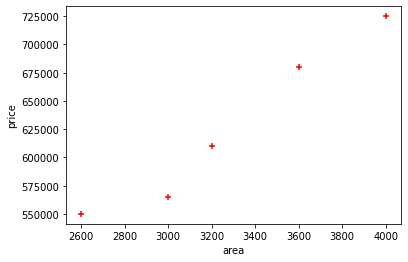

In [463]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [464]:
#leaner model's object accept only 2d Array so we need to drop colum
new_df = df.drop('price',axis='columns') 
new_df

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [465]:
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [466]:
 #make instance
model = linear_model.LinearRegression()   
model.fit(new_df,df.price)

LinearRegression()

In [467]:
print(model.predict([[5000]]))

[859554.79452055]


In [468]:
model.coef_ #slope

array([135.78767123])

In [469]:
model.intercept_

180616.43835616432

In [470]:
#y=m*x+b
135.78767123*5000 + 180616.43835616432

859554.7945061643

In [471]:
area_df = pd.read_csv("area.csv")
area_df

area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100

In [472]:
p=model.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [473]:
area_df['prices']=p
area_df

area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [474]:
area_df.to_csv("prection(husing).csv")  #save file in working directory

# Exercise

**predict canada's per capita incom in year 2020 using Lenear Regression**

In [475]:
canada_df = pd.read_csv("LeanearReg_Exercise.csv")
canada_df.head()

year       income
0  1970  3399.299037
1  1971  3768.297935
2  1972  4251.175484
3  1973  4804.463248
4  1974  5576.514583

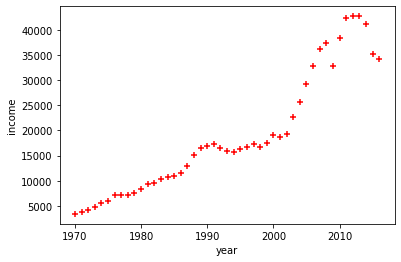

In [476]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(canada_df.year,canada_df.income,color='red',marker='+')

In [477]:
canada_new_df = canada_df.drop('income',axis='columns')  #leaner model's object accept only 2d Array so we need to drop colum
canada_new_df.head()

year
0  1970
1  1971
2  1972
3  1973
4  1974

In [478]:
new_model = linear_model.LinearRegression()
new_model.fit(canada_new_df,canada_df.income)

LinearRegression()

In [479]:
print(new_model.predict([[2020]]))

[41288.69409442]


# Linear Regression Multiple Variable

In [480]:
df = pd.read_csv("housing2.csv")
df

area  bedroom  age   price
0  2600      3.0   20  550000
1  3000      4.0   15  565000
2  3200      NaN   18  610000
3  3600      3.0   30  595000
4  4000      5.0    8  760000
5  4100      6.0    8  810000

In [481]:
#handle missing data

import math
df.bedroom.median()

4.0

In [482]:
df.bedroom=df.bedroom.fillna(df.bedroom.median())
df

area  bedroom  age   price
0  2600      3.0   20  550000
1  3000      4.0   15  565000
2  3200      4.0   18  610000
3  3600      3.0   30  595000
4  4000      5.0    8  760000
5  4100      6.0    8  810000

In [483]:
model = linear_model.LinearRegression()
model.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [484]:
 #pridict takes only 2d array so we apply two square braket
model.predict([[3000,3,40]]) 

array([498408.25158031])

In [485]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [486]:
model.intercept_

221323.00186540396

In [487]:
#y = m1(model.coef_)+m2(model.coef_)+m3(model.coef_)+model.intercept_
12.06244194*3000+23388.88007794*3-3231.71790863*40+221323.00186540396

198408.25157402398

In [488]:
model.predict([[2500,4,5]])

array([578876.03748933])

# Exercise

In [489]:
# 2 year experiance , 9 test , 6 interview
# 12 10 10

In [490]:
d = pd.read_csv("housing2Exercise.csv")
d

experience  test_score  interview_score  salary
0        NaN         8.0                9   50000
1        NaN         8.0                6   45000
2       five         6.0                7   60000
3        two        10.0               10   65000
4      seven         9.0                6   70000
5      three         7.0               10   62000
6        ten         NaN                7   72000
7     eleven         7.0                8   80000

In [491]:
d.experience = d.experience.fillna("zero")
d


experience  test_score  interview_score  salary
0       zero         8.0                9   50000
1       zero         8.0                6   45000
2       five         6.0                7   60000
3        two        10.0               10   65000
4      seven         9.0                6   70000
5      three         7.0               10   62000
6        ten         NaN                7   72000
7     eleven         7.0                8   80000

In [492]:
from word2number import w2n
d.experience = d.experience.apply(w2n.word_to_num)
d

experience  test_score  interview_score  salary
0           0         8.0                9   50000
1           0         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         NaN                7   72000
7          11         7.0                8   80000

In [493]:
import math
median_test_score = math.floor(d['test_score'].mean())
median_test_score

7

In [494]:
d['test_score'] = d['test_score'].fillna(median_test_score)
d

experience  test_score  interview_score  salary
0           0         8.0                9   50000
1           0         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         7.0                7   72000
7          11         7.0                8   80000

In [495]:
reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score','interview_score']],d['salary'])

LinearRegression()

In [496]:
reg.predict([[2,9,6]])

array([53713.86677124])

# Gradient Descent & Cost Function

In [497]:
%matplotlib inline
def gradient_des(x,y):
    
    m = b = 0
    iteration = 100
    n=len(x)
    learning_rate = 0.08
    #plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(iteration):
        yp = m*x+b
       # plt.plot(x,yp,color='green')
        cost = (1/n)*sum([val**2 for val in (y-yp)])
        md = -(2/n)*sum(x*(y-yp))
        bd = -(2/n)*sum(y-yp)
        m=m-learning_rate*md
        b=b-learning_rate*bd
        
        print("m{} ,b{} ,cost{}  iteration{}".format(m,b,cost,i))
    
   

In [498]:
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])

In [499]:
gradient_des(x,y)

m4.96 ,b1.44 ,cost89.0  iteration0
m0.4991999999999983 ,b0.26879999999999993 ,cost71.10560000000002  iteration1
m4.451584000000002 ,b1.426176000000001 ,cost56.8297702400001  iteration2
m0.892231679999997 ,b0.5012275199999995 ,cost45.43965675929613  iteration3
m4.041314713600002 ,b1.432759910400001 ,cost36.35088701894832  iteration4
m1.2008760606719973 ,b0.7036872622079998 ,cost29.097483330142282  iteration5
m3.7095643080294423 ,b1.4546767911321612 ,cost23.307872849944438  iteration6
m1.4424862661541864 ,b0.881337636696883 ,cost18.685758762535738  iteration7
m3.4406683721083144 ,b1.4879302070713722 ,cost14.994867596913156  iteration8
m1.6308855378034224 ,b1.0383405553279617 ,cost12.046787238456794  iteration9
m3.2221235247119777 ,b1.5293810083298451 ,cost9.691269350698109  iteration10
m1.7770832372205707 ,b1.1780607551353204 ,cost7.8084968312098315  iteration11
m3.0439475772474127 ,b1.5765710804477953 ,cost6.302918117062937  iteration12
m1.8898457226770244 ,b1.3032248704973899 ,cost5.09

# Exercise

In [500]:
def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))


m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

m 1.0443023981363866, b 0.03254449065450432, cost 31.80799420189285, iteration 409
m 1.0443017882350367, b 0.032587712780038275, cost 31.80798485895054, iteration 410
m 1.0443011783476885, b 0.03263093391328608, cost 31.807975516437196, iteration 411
m 1.0443005684743425, b 0.03267415405427053, cost 31.807966174352842, iteration 412
m 1.0442999586149972, b 0.03271737320301439, cost 31.807956832697393, iteration 413
m 1.044299348769654, b 0.03276059135954046, cost 31.80794749147089, iteration 414
m 1.0442987389383105, b 0.03280380852387149, cost 31.807938150673266, iteration 415
m 1.044298129120968, b 0.032847024696030284, cost 31.807928810304567, iteration 416
m 1.0442975193176252, b 0.032890239876039604, cost 31.807919470364716, iteration 417
m 1.0442969095282824, b 0.03293345406392224, cost 31.807910130853703, iteration 418
m 1.0442962997529388, b 0.03297666725970097, cost 31.80790079177154, iteration 419
m 1.0442956899915945, b 0.033019879463398565, cost 31.807891453118152, iteratio

m 1.0440166788656124, b 0.05279267372498268, cost 31.803640818974834, iteration 880
m 1.0440160755237573, b 0.052835430996203525, cost 31.803631675918663, iteration 881
m 1.0440154721957522, b 0.05287818728581025, cost 31.80362253328228, iteration 882
m 1.044014868881599, b 0.052920942593825425, cost 31.80361339106571, iteration 883
m 1.0440142655812963, b 0.05296369692027157, cost 31.80360424926891, iteration 884
m 1.044013662294844, b 0.05300645026517123, cost 31.803595107891823, iteration 885
m 1.044013059022242, b 0.053049202628546926, cost 31.803585966934477, iteration 886
m 1.0440124557634898, b 0.0530919540104212, cost 31.803576826396853, iteration 887
m 1.044011852518587, b 0.05313470441081659, cost 31.803567686278896, iteration 888
m 1.0440112492875333, b 0.05317745382975561, cost 31.803558546580632, iteration 889
m 1.0440106460703291, b 0.05322020226726082, cost 31.803549407302008, iteration 890
m 1.0440100428669727, b 0.05326294972335472, cost 31.803540268443, iteration 891


m 1.0437830211059136, b 0.06935139264313031, cost 31.800115664278355, iteration 1269
m 1.0437824231283312, b 0.06939376976212305, cost 31.800106683080106, iteration 1270
m 1.043781825164479, b 0.06943614590822919, cost 31.800097702294245, iteration 1271
m 1.0437812272143538, b 0.06947852108147103, cost 31.80008872192072, iteration 1272
m 1.0437806292779566, b 0.0695208952818709, cost 31.800079741959554, iteration 1273
m 1.0437800313552865, b 0.06956326850945116, cost 31.800070762410698, iteration 1274
m 1.0437794334463433, b 0.06960564076423412, cost 31.800061783274113, iteration 1275
m 1.0437788355511273, b 0.06964801204624213, cost 31.800052804549853, iteration 1276
m 1.043778237669637, b 0.06969038235549752, cost 31.800043826237825, iteration 1277
m 1.0437776398018734, b 0.06973275169202262, cost 31.800034848338044, iteration 1278
m 1.043777041947835, b 0.06977512005583975, cost 31.800025870850465, iteration 1279
m 1.0437764441075228, b 0.06981748744697126, cost 31.800016893775133, 

m 1.043498747200234, b 0.08949714644112464, cost 31.795869322635408, iteration 1747
m 1.0434981557489642, b 0.08953906105735794, cost 31.79586053640846, iteration 1748
m 1.0434975643112732, b 0.08958097471132268, cost 31.79585175058499, iteration 1749
m 1.0434969728871597, b 0.08962288740304093, cost 31.795842965164894, iteration 1750
m 1.043496381476625, b 0.0896647991325348, cost 31.795834180148194, iteration 1751
m 1.0434957900796666, b 0.08970670989982638, cost 31.795825395534855, iteration 1752
m 1.0434951986962866, b 0.08974861970493775, cost 31.79581661132484, iteration 1753
m 1.0434946073264824, b 0.08979052854789099, cost 31.795807827518207, iteration 1754
m 1.0434940159702557, b 0.08983243642870822, cost 31.79579904411483, iteration 1755
m 1.0434934246276044, b 0.08987434334741151, cost 31.79579026111479, iteration 1756
m 1.0434928332985298, b 0.08991624930402295, cost 31.79578147851801, iteration 1757
m 1.0434922419830301, b 0.08995815429856462, cost 31.79577269632445, itera

m 1.0432286933321582, b 0.1086351630854938, cost 31.791878553397233, iteration 2206
m 1.043228108080739, b 0.10867663833442434, cost 31.791869950407, iteration 2207
m 1.0432275228427557, b 0.10871811263117322, cost 31.79186134781176, iteration 2208
m 1.0432269376182088, b 0.10875958597576232, cost 31.791852745611557, iteration 2209
m 1.0432263524070962, b 0.10880105836821348, cost 31.791844143806312, iteration 2210
m 1.04322576720942, b 0.10884252980854858, cost 31.79183554239599, iteration 2211
m 1.0432251820251777, b 0.10888400029678946, cost 31.791826941380613, iteration 2212
m 1.0432245968543712, b 0.108925469832958, cost 31.791818340760173, iteration 2213
m 1.0432240116969973, b 0.10896693841707603, cost 31.79180974053462, iteration 2214
m 1.043223426553059, b 0.10900840604916542, cost 31.791801140703974, iteration 2215
m 1.0432228414225526, b 0.10904987272924802, cost 31.791792541268126, iteration 2216
m 1.0432222563054816, b 0.10909133845734571, cost 31.791783942227184, iteratio

m 1.0429388945898233, b 0.12917244771633388, cost 31.787642778629163, iteration 2704
m 1.0429383159915535, b 0.12921345147380728, cost 31.78763437012509, iteration 2705
m 1.0429377374065678, b 0.12925445428992344, cost 31.7876259620071, iteration 2706
m 1.0429371588348644, b 0.12929545616470398, cost 31.787617554275183, iteration 2707
m 1.0429365802764443, b 0.12933645709817052, cost 31.78760914692926, iteration 2708
m 1.042936001731306, b 0.12937745709034465, cost 31.787600739969395, iteration 2709
m 1.042935423199451, b 0.12941845614124803, cost 31.787592333395523, iteration 2710
m 1.0429348446808764, b 0.1294594542509022, cost 31.78758392720767, iteration 2711
m 1.0429342661755847, b 0.1295004514193288, cost 31.787575521405753, iteration 2712
m 1.0429336876835729, b 0.12954144764654946, cost 31.787567115989795, iteration 2713
m 1.0429331092048435, b 0.12958244293258578, cost 31.787558710959804, iteration 2714
m 1.042932530739393, b 0.1296234372774593, cost 31.787550306315683, iterat

m 1.0426815807643308, b 0.14740761061252616, cost 31.783922401126276, iteration 3151
m 1.0426810080734272, b 0.14744819573025822, cost 31.783914163443832, iteration 3152
m 1.0426804353956727, b 0.14748877991624415, cost 31.78390592613962, iteration 3153
m 1.042679862731065, b 0.14752936317050527, cost 31.783897689213592, iteration 3154
m 1.0426792900796045, b 0.14756994549306302, cost 31.78388945266578, iteration 3155
m 1.0426787174412908, b 0.14761052688393875, cost 31.78388121649615, iteration 3156
m 1.0426781448161238, b 0.14765110734315387, cost 31.78387298070469, iteration 3157
m 1.0426775722041028, b 0.14769168687072978, cost 31.783864745291396, iteration 3158
m 1.0426769996052279, b 0.14773226546668786, cost 31.783856510256186, iteration 3159
m 1.0426764270194986, b 0.1477728431310495, cost 31.783848275599134, iteration 3160
m 1.0426758544469144, b 0.14781341986383606, cost 31.783840041320147, iteration 3161
m 1.0426752818874756, b 0.14785399566506896, cost 31.78383180741923, it

m 1.042404230452504, b 0.16706270728593034, cost 31.77995507997143, iteration 3638
m 1.0424036641289622, b 0.16710284116532506, cost 31.77994702444902, iteration 3639
m 1.0424030978184218, b 0.16714297412333307, cost 31.77993896929651, iteration 3640
m 1.0424025315208827, b 0.1671831061599755, cost 31.779930914513855, iteration 3641
m 1.0424019652363445, b 0.16722323727527352, cost 31.779922860101006, iteration 3642
m 1.042401398964807, b 0.16726336746924828, cost 31.779914806057988, iteration 3643
m 1.0424008327062702, b 0.16730349674192094, cost 31.779906752384786, iteration 3644
m 1.0424002664607328, b 0.16734362509331263, cost 31.77989869908134, iteration 3645
m 1.042399700228196, b 0.16738375252344453, cost 31.779890646147688, iteration 3646
m 1.0423991340086576, b 0.16742387903233777, cost 31.779882593583807, iteration 3647
m 1.0423985678021195, b 0.1674640046200135, cost 31.779874541389628, iteration 3648
m 1.0423980016085792, b 0.1675041292864929, cost 31.779866489565144, itera

m 1.0421518148939242, b 0.18495074272061035, cost 31.776382988805945, iteration 4086
m 1.0421512543652944, b 0.18499046592955645, cost 31.776375097296597, iteration 4087
m 1.042150693849535, b 0.18503018822654396, cost 31.776367206149576, iteration 4088
m 1.042150133346642, b 0.18506990961159378, cost 31.77635931536487, iteration 4089
m 1.0421495728566188, b 0.18510963008472686, cost 31.776351424942483, iteration 4090
m 1.0421490123794617, b 0.1851493496459641, cost 31.776343534882372, iteration 4091
m 1.0421484519151727, b 0.1851890682953265, cost 31.776335645184545, iteration 4092
m 1.0421478914637505, b 0.18522878603283496, cost 31.776327755848982, iteration 4093
m 1.042147331025195, b 0.1852685028585104, cost 31.776319866875635, iteration 4094
m 1.0421467705995064, b 0.1853082187723738, cost 31.776311978264488, iteration 4095
m 1.0421462101866832, b 0.18534793377444603, cost 31.77630409001563, iteration 4096
m 1.0421456497867265, b 0.18538764786474807, cost 31.776296202128886, iter

m 1.0418498872712767, b 0.20634756961589715, cost 31.772158477369615, iteration 4628
m 1.0418493336742503, b 0.20638680160016226, cost 31.772150779829254, iteration 4629
m 1.0418487800899336, b 0.20642603268374624, cost 31.772143082642305, iteration 4630
m 1.0418482265183255, b 0.20646526286666972, cost 31.772135385808816, iteration 4631
m 1.0418476729594268, b 0.2065044921489534, cost 31.772127689328684, iteration 4632
m 1.0418471194132362, b 0.20654372053061792, cost 31.77211999320194, iteration 4633
m 1.041846565879754, b 0.206582948011684, cost 31.772112297428567, iteration 4634
m 1.0418460123589797, b 0.2066221745921723, cost 31.772104602008547, iteration 4635
m 1.041845458850913, b 0.2066614002721035, cost 31.772096906941886, iteration 4636
m 1.0418449053555536, b 0.20670062505149828, cost 31.772089212228536, iteration 4637
m 1.0418443518729013, b 0.20673984893037728, cost 31.772081517868457, iteration 4638
m 1.0418437984029556, b 0.20677907190876121, cost 31.772073823861707, ite

m 1.0416486663006985, b 0.22060757748602722, cost 31.769372223824952, iteration 4993
m 1.0416481173232692, b 0.22064648209147814, cost 31.769364654215764, iteration 4994
m 1.0416475683584423, b 0.2206853858037638, cost 31.769357084954148, iteration 4995
m 1.0416470194062195, b 0.22072428862290472, cost 31.769349516040066, iteration 4996
m 1.0416464704665982, b 0.22076319054892138, cost 31.76934194747351, iteration 4997
m 1.0416459215395808, b 0.2208020915818343, cost 31.76933437925447, iteration 4998
m 1.041645372625164, b 0.22084099172166397, cost 31.76932681138294, iteration 4999
m 1.0416448237233507, b 0.22087989096843091, cost 31.769319243858877, iteration 5000
m 1.0416442748341375, b 0.2209187893221556, cost 31.76931167668228, iteration 5001
m 1.0416437259575269, b 0.2209576867828586, cost 31.769304109853138, iteration 5002
m 1.0416431770935162, b 0.22099658335056033, cost 31.769296543371407, iteration 5003
m 1.0416426282421072, b 0.22103547902528134, cost 31.769288977237114, iter

m 1.0413605526568344, b 0.24102544356226147, cost 31.765423438501564, iteration 5521
m 1.0413600102938692, b 0.24106387941784593, cost 31.765416050201384, iteration 5522
m 1.0413594679433535, b 0.2411023143910266, cost 31.765408662240436, iteration 5523
m 1.041358925605291, b 0.2411407484818238, cost 31.765401274618668, iteration 5524
m 1.0413583832796776, b 0.24117918169025768, cost 31.76539388733615, iteration 5525
m 1.0413578409665165, b 0.24121761401634859, cost 31.765386500392818, iteration 5526
m 1.041357298665804, b 0.24125604546011672, cost 31.765379113788654, iteration 5527
m 1.0413567563775432, b 0.24129447602158238, cost 31.76537172752363, iteration 5528
m 1.0413562141017307, b 0.2413329057007658, cost 31.765364341597774, iteration 5529
m 1.0413556718383692, b 0.24137133449768725, cost 31.765356956011, iteration 5530
m 1.041355129587455, b 0.24140976241236695, cost 31.76534957076337, iteration 5531
m 1.041354587348992, b 0.2414481894448252, cost 31.76534218585482, iteration 

m 1.0411515854680977, b 0.2558344058062597, cost 31.76258935546664, iteration 5908
m 1.0411510479025647, b 0.2558725016802296, cost 31.762582097293713, iteration 5909
m 1.0411505103493723, b 0.255910596679601, cost 31.76257483945409, iteration 5910
m 1.041149972808522, b 0.2559486908043939, cost 31.762567581947685, iteration 5911
m 1.0411494352800115, b 0.25598678405462844, cost 31.762560324774537, iteration 5912
m 1.0411488977638421, b 0.2560248764303247, cost 31.76255306793458, iteration 5913
m 1.0411483602600122, b 0.2560629679315027, cost 31.76254581142784, iteration 5914
m 1.0411478227685234, b 0.25610105855818255, cost 31.762538555254253, iteration 5915
m 1.0411472852893728, b 0.2561391483103843, cost 31.76253129941388, iteration 5916
m 1.0411467478225631, b 0.2561772371881281, cost 31.762524043906623, iteration 5917
m 1.0411462103680909, b 0.256215325191434, cost 31.7625167887325, iteration 5918
m 1.041145672925959, b 0.256253412320322, cost 31.762509533891514, iteration 5919
m 

m 1.0408530029240879, b 0.2769941756614463, cost 31.758583572098434, iteration 6467
m 1.0408524722133614, b 0.2770317857530501, cost 31.758576497851596, iteration 6468
m 1.0408519415148187, b 0.27706939498120786, cost 31.75856942392959, iteration 6469
m 1.0408514108284599, b 0.2771070033459394, cost 31.758562350332358, iteration 6470
m 1.0408508801542848, b 0.2771446108472646, cost 31.75855527705993, iteration 6471
m 1.0408503494922923, b 0.2771822174852032, cost 31.758548204112255, iteration 6472
m 1.0408498188424828, b 0.27721982325977507, cost 31.75854113148936, iteration 6473
m 1.0408492882048561, b 0.277257428171, cost 31.758534059191177, iteration 6474
m 1.0408487575794116, b 0.27729503221889784, cost 31.758526987217728, iteration 6475
m 1.0408482269661488, b 0.2773326354034884, cost 31.75851991556901, iteration 6476
m 1.0408476963650684, b 0.2773702377247915, cost 31.758512844244976, iteration 6477
m 1.0408471657761684, b 0.27740783918282697, cost 31.758505773245613, iteration 6

m 1.0406238155110765, b 0.2932360927135641, cost 31.75554366811411, iteration 6901
m 1.0406232900619954, b 0.29327332992602273, cost 31.7555367334449, iteration 6902
m 1.0406227646249775, b 0.2933105662835958, cost 31.75552979909403, iteration 6903
m 1.0406222392000224, b 0.293347801786303, cost 31.75552286506158, iteration 6904
m 1.04062171378713, b 0.29338503643416386, cost 31.755515931347492, iteration 6905
m 1.0406211883862997, b 0.2934222702271981, cost 31.755508997951797, iteration 6906
m 1.0406206629975319, b 0.2934595031654253, cost 31.75550206487444, iteration 6907
m 1.0406201376208255, b 0.29349673524886505, cost 31.755495132115392, iteration 6908
m 1.0406196122561806, b 0.29353396647753704, cost 31.755488199674694, iteration 6909
m 1.0406190869035972, b 0.2935711968514609, cost 31.7554812675523, iteration 6910
m 1.0406185615630745, b 0.2936084263706562, cost 31.755474335748165, iteration 6911
m 1.040618036234613, b 0.2936456550351426, cost 31.75546740426232, iteration 6912
m

m 1.0403143320859176, b 0.315168379720055, cost 31.751486796331676, iteration 7494
m 1.0403138137419043, b 0.31520511341483126, cost 31.751480047934212, iteration 7495
m 1.04031329540979, b 0.31524184626628166, cost 31.751473299846623, iteration 7496
m 1.0403127770895768, b 0.31527857827442557, cost 31.751466552068855, iteration 7497
m 1.0403122587812614, b 0.3153153094392823, cost 31.751459804600913, iteration 7498
m 1.0403117404848472, b 0.3153520397608713, cost 31.751453057442788, iteration 7499
m 1.0403112222003301, b 0.31538876923921183, cost 31.751446310594446, iteration 7500
m 1.0403107039277133, b 0.31542549787432334, cost 31.751439564055904, iteration 7501
m 1.0403101856669934, b 0.3154622256662251, cost 31.75143281782716, iteration 7502
m 1.040309667418173, b 0.31549895261493655, cost 31.751426071908117, iteration 7503
m 1.0403091491812495, b 0.315535678720477, cost 31.751419326298812, iteration 7504
m 1.0403086309562242, b 0.31557240398286585, cost 31.75141258099925, iterati

m 1.0400827883998005, b 0.3315772797309526, cost 31.748487717589178, iteration 7943
m 1.0400822753715273, b 0.3316136367130175, cost 31.748481106894822, iteration 7944
m 1.0400817623550316, b 0.3316499928604051, cost 31.748474496503974, iteration 7945
m 1.0400812493503138, b 0.33168634817313447, cost 31.74846788641665, iteration 7946
m 1.0400807363573734, b 0.33172270265122483, cost 31.748461276632852, iteration 7947
m 1.0400802233762105, b 0.3317590562946953, cost 31.74845466715253, iteration 7948
m 1.040079710406824, b 0.3317954091035651, cost 31.748448057975658, iteration 7949
m 1.040079197449215, b 0.33183176107785334, cost 31.74844144910231, iteration 7950
m 1.0400786845033814, b 0.33186811221757917, cost 31.748434840532333, iteration 7951
m 1.0400781715693248, b 0.3319044625227618, cost 31.74842823226585, iteration 7952
m 1.0400776586470433, b 0.33194081199342035, cost 31.748421624302747, iteration 7953
m 1.0400771457365379, b 0.331977160629574, cost 31.74841501664308, iteration 

m 1.039781126789289, b 0.3529552550366903, cost 31.7446268087516, iteration 8535
m 1.0397806206865112, b 0.3529911212268658, cost 31.74462037533137, iteration 8536
m 1.0397801145953518, b 0.3530269865936315, cost 31.74461394220656, iteration 8537
m 1.0397796085158117, b 0.35306285113700625, cost 31.744607509377076, iteration 8538
m 1.0397791024478897, b 0.35309871485700894, cost 31.744601076842986, iteration 8539
m 1.0397785963915864, b 0.35313457775365853, cost 31.744594644604213, iteration 8540
m 1.0397780903469005, b 0.3531704398269739, cost 31.744588212660815, iteration 8541
m 1.039777584313833, b 0.3532063010769739, cost 31.744581781012723, iteration 8542
m 1.0397770782923819, b 0.35324216150367754, cost 31.74457534965995, iteration 8543
m 1.0397765722825494, b 0.35327802110710366, cost 31.74456891860245, iteration 8544
m 1.0397760662843323, b 0.3533138798872711, cost 31.744562487840263, iteration 8545
m 1.0397755602977328, b 0.3533497378441988, cost 31.744556057373348, iteration 

m 1.0395735931014354, b 0.36766262879403083, cost 31.742001093014313, iteration 8947
m 1.0395730917631807, b 0.36769815733484285, cost 31.741994780154155, iteration 8948
m 1.0395725904364348, b 0.3677336850599967, cost 31.741988467583866, iteration 8949
m 1.0395720891211986, b 0.3677692119695112, cost 31.741982155303397, iteration 8950
m 1.0395715878174714, b 0.36780473806340497, cost 31.741975843312773, iteration 8951
m 1.0395710865252534, b 0.3678402633416968, cost 31.74196953161198, iteration 8952
m 1.0395705852445436, b 0.36787578780440533, cost 31.741963220200933, iteration 8953
m 1.0395700839753421, b 0.36791131145154937, cost 31.74195690907975, iteration 8954
m 1.0395695827176488, b 0.3679468342831476, cost 31.74195059824828, iteration 8955
m 1.0395690814714635, b 0.36798235629921877, cost 31.741944287706602, iteration 8956
m 1.039568580236785, b 0.3680178774997816, cost 31.741937977454697, iteration 8957
m 1.039568079013615, b 0.3680533978848548, cost 31.741931667492466, iterat

m 1.0393456766121094, b 0.38381447878358593, cost 31.73914610851007, iteration 9404
m 1.0393451805063214, b 0.3838496365129969, cost 31.739139926736875, iteration 9405
m 1.039344684411924, b 0.3838847934352628, cost 31.739133745247543, iteration 9406
m 1.0393441883289145, b 0.3839199495504021, cost 31.73912756404205, iteration 9407
m 1.0393436922572952, b 0.3839551048584333, cost 31.73912138312034, iteration 9408
m 1.0393431961970638, b 0.38399025935937503, cost 31.739115202482438, iteration 9409
m 1.0393427001482212, b 0.3840254130532457, cost 31.739109022128332, iteration 9410
m 1.0393422041107667, b 0.38406056594006394, cost 31.739102842058, iteration 9411
m 1.0393417080847003, b 0.3840957180198482, cost 31.739096662271415, iteration 9412
m 1.0393412120700214, b 0.3841308692926171, cost 31.739090482768564, iteration 9413
m 1.03934071606673, b 0.38416601975838904, cost 31.739084303549465, iteration 9414
m 1.0393402200748258, b 0.3842011694171827, cost 31.739078124614053, iteration 94

m 1.0391501068141744, b 0.3976740027174013, cost 31.736720191958042, iteration 9800
m 1.039149615198245, b 0.39770884226223957, cost 31.736714121571147, iteration 9801
m 1.0391491235936015, b 0.39774368100723756, cost 31.736708051462962, iteration 9802
m 1.0391486320002443, b 0.3977785189524136, cost 31.736701981633498, iteration 9803
m 1.0391481404181733, b 0.3978133560977861, cost 31.73669591208273, iteration 9804
m 1.0391476488473876, b 0.39784819244337344, cost 31.736689842810655, iteration 9805
m 1.0391471572878874, b 0.3978830279891939, cost 31.736683773817244, iteration 9806
m 1.0391466657396724, b 0.39791786273526586, cost 31.73667770510248, iteration 9807
m 1.0391461742027424, b 0.3979526966816077, cost 31.736671636666376, iteration 9808
m 1.0391456826770968, b 0.39798752982823776, cost 31.736665568508922, iteration 9809
m 1.0391451911627356, b 0.39802236217517445, cost 31.73665950063004, iteration 9810
m 1.039144699659659, b 0.3980571937224361, cost 31.736653433029797, iterat

# Joblib & Pickle

In [501]:
df = pd.read_csv("housing.csv")
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

In [502]:
new_df = df.drop('price',axis='columns')  #leaner model's object accept only 2d Array so we need to drop colum
new_df

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [503]:
model = linear_model.LinearRegression()   #make instance
model.fit(new_df,df.price)

LinearRegression()

In [504]:
print(model.predict([[5000]]))

[859554.79452055]


In [505]:
import pickle

In [506]:
with open("model_pickle",'wb') as file:
    pickle.dump(model,file)

In [507]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [508]:
mp.coef_

array([135.78767123])

In [509]:
mp.intercept_

180616.43835616432

In [510]:
mp.predict([[5000]])

array([859554.79452055])

In [511]:
import joblib

In [512]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [513]:
mj = joblib.load('model_pickle')

In [514]:
mj.coef_

array([135.78767123])

# Dummy Variables & One Hot Encoding

In [515]:
import pandas as pd

In [516]:
df = pd.read_csv("homeprice.csv")
df

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

In [517]:
dummies=pd.get_dummies(df.town)
dummies

monroe township  robinsville  west windsor
0                 1            0             0
1                 1            0             0
2                 1            0             0
3                 1            0             0
4                 1            0             0
5                 0            0             1
6                 0            0             1
7                 0            0             1
8                 0            0             1
9                 0            1             0
10                0            1             0
11                0            1             0
12                0            1             0

In [518]:
df_dummies = pd.concat([df,dummies],axis='columns')
df_dummies

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1             0
12      robinsville  3600  695000                0            1             0

In [519]:
df_dummies.drop(['town','west windsor'],axis='columns',inplace=True)
df_dummies

area   price  monroe township  robinsville
0   2600  550000                1            0
1   3000  565000                1            0
2   3200  610000                1            0
3   3600  680000                1            0
4   4000  725000                1            0
5   2600  585000                0            0
6   2800  615000                0            0
7   3300  650000                0            0
8   3600  710000                0            0
9   2600  575000                0            1
10  2900  600000                0            1
11  3100  620000                0            1
12  3600  695000                0            1

In [520]:
x = df_dummies.drop('price',axis = 'columns') #target point so we have to drop it
x

area  monroe township  robinsville
0   2600                1            0
1   3000                1            0
2   3200                1            0
3   3600                1            0
4   4000                1            0
5   2600                0            0
6   2800                0            0
7   3300                0            0
8   3600                0            0
9   2600                0            1
10  2900                0            1
11  3100                0            1
12  3600                0            1

In [521]:
y = df_dummies.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [522]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [523]:
#predict 3400 sqft area in west windsor
print(model.predict([[3400,0,0]]))  #here how we know that it is  west windsor 
                                     #so we pass 0 0 so third is automaticaly became 1

[681241.66845839]


In [524]:
#predict 2800 sqft area in robbinsville
print(model.predict([[2800,0,1]]))

[590775.63964739]


# Split available dataset into training and test 

In [525]:
import pandas as pd

In [526]:
df = pd.read_csv("Carprice.csv")
df.head()

Mileage  Age(yrs)  Sell Price($)
0    69000         6          18000
1    35000         3          34000
2    57000         5          26100
3    22500         2          40000
4    46000         4          31500

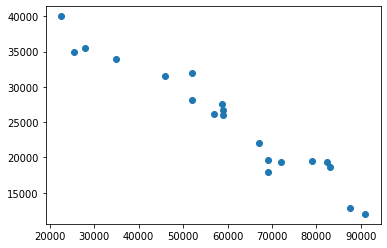

In [527]:
%matplotlib inline
plt.scatter(df['Mileage'],df['Sell Price($)'])

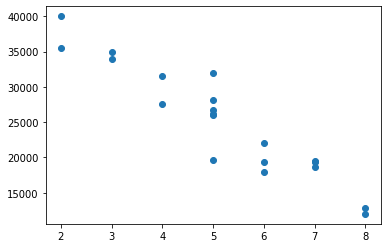

In [528]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [529]:
X = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [530]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [531]:
y_test

15    35000
9     22000
17    19700
0     18000
11    19500
7     19300
Name: Sell Price($), dtype: int64

In [532]:
y_train

8     12000
19    28200
3     40000
16    35500
10    18700
18    12800
5     26750
2     26100
1     34000
12    26000
6     32000
14    19400
13    27500
4     31500
Name: Sell Price($), dtype: int64

In [533]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [534]:
X_test

Mileage  Age(yrs)
15    25400         3
9     67000         6
17    69000         5
0     69000         6
11    79000         7
7     72000         6

In [535]:
clf.predict(X_test)

array([38198.0275544 , 23024.90991999, 22896.01774701, 22371.1370564 ,
       18577.39204786, 21390.47776102])

In [536]:
y_test

15    35000
9     22000
17    19700
0     18000
11    19500
7     19300
Name: Sell Price($), dtype: int64

In [537]:
clf.score(X_test,y_test)

0.7747880765251824

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

Mileage  Age(yrs)
7     72000         6
10    83000         7
5     59000         5
6     52000         5
3     22500         2
18    87600         8

# Logistic Regression

In [539]:
df = pd.read_csv("LIC(LR).csv")
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

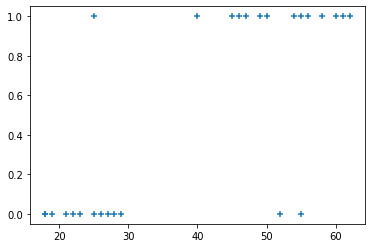

In [540]:
plt.scatter(df.age,df.bought_insurance,marker='+')

In [541]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [542]:
len(X_train)

24

In [543]:
len(X_test)

3

In [544]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [545]:
model.fit(X_train,y_train)

LogisticRegression()

In [546]:
X_test

age
23   45
3    52
10   18

In [547]:
model.predict(X_test)

array([1, 1, 0])

In [548]:
model.predict_proba(X_test)

array([[0.22554103, 0.77445897],
       [0.08868431, 0.91131569],
       [0.9523169 , 0.0476831 ]])

In [549]:
model.score(X_test,y_test)

0.6666666666666666

# Exercise

In [550]:
df = pd.read_csv("HR_(LR).csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

Data exploration and visualization

In [551]:
left = df[df.left==1]
left.shape

(3571, 10)

In [552]:
retained = df[df.left==0]
retained.shape

(11428, 10)

Average numbers for all columns

In [553]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<AxesSubplot:xlabel='salary'>

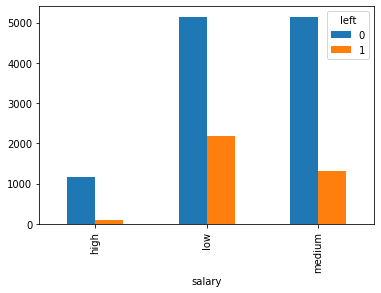

In [554]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

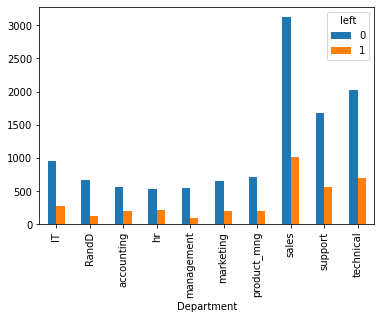

In [555]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [556]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [557]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [558]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [559]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [560]:
y = df.left

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [562]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [563]:
model.fit(X_train, y_train)

LogisticRegression()

In [564]:
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

In [565]:
model.score(X_test,y_test)

0.7786666666666666

# Logistic Regression with Multiple Variable

In [566]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [567]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [568]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

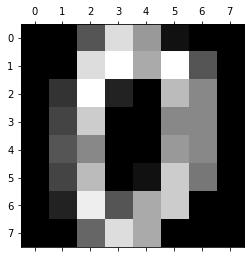

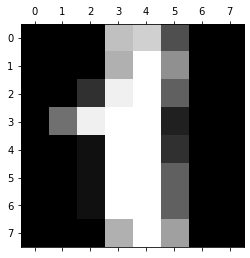

In [569]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [570]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [571]:
model = LogisticRegression()

In [572]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [573]:
model.fit(X_train, y_train)

/home/darshan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [574]:
model.score(X_test, y_test)

0.9583333333333334

In [575]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [576]:
#Confusion Matrix
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 38,  0,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 37]])

Text(69.0, 0.5, 'Truth')

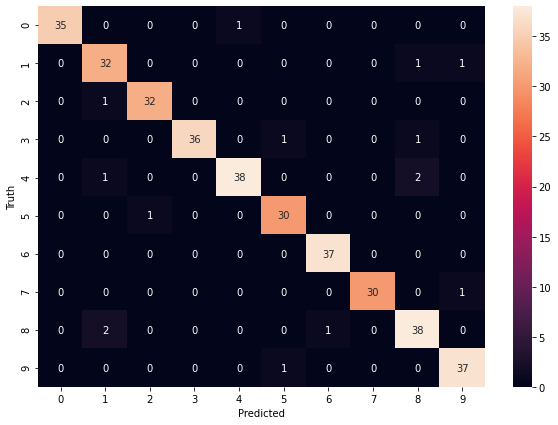

In [577]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree Classification

In [578]:
df = pd.read_csv("Salary(Dt).csv")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [579]:
input = df.drop('salary_more_then_100k',axis = 'columns')
input.head()


company                  job     degree
0  google      sales executive  bachelors
1  google      sales executive    masters
2  google     business manager  bachelors
3  google     business manager    masters
4  google  computer programmer  bachelors

In [580]:
target = df['salary_more_then_100k']

In [581]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [582]:
input['company_n'] = le_company.fit_transform(input['company'])
input['job_n'] = le_job.fit_transform(input['job'])
input['degree_n'] = le_degree.fit_transform(input['degree'])
input.head()

company                  job     degree  company_n  job_n  degree_n
0  google      sales executive  bachelors          2      2         0
1  google      sales executive    masters          2      2         1
2  google     business manager  bachelors          2      0         0
3  google     business manager    masters          2      0         1
4  google  computer programmer  bachelors          2      1         0

In [583]:
input_n = input.drop(['company','job','degree'],axis = 'columns')
input_n.head()

company_n  job_n  degree_n
0          2      2         0
1          2      2         1
2          2      0         0
3          2      0         1
4          2      1         0

In [584]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [585]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [586]:
model.predict([[1,0,0]])

array([1])

In [587]:
model.score(input_n,target)

1.0

**Exercise: Build decision tree model to predict survival based on certain parameters**


**In this file using following columns build a model to predict if person would survive or not**
1.Pclass
2.Sex
3.Age
4.Fare

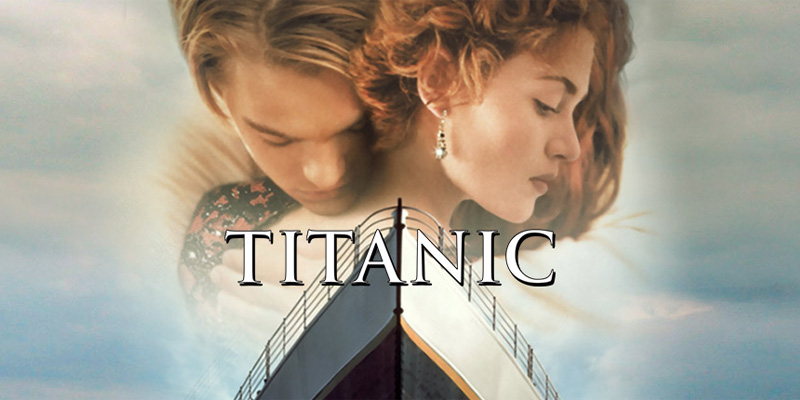

In [588]:
df = pd.read_csv("Titanic(DT).csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [589]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [590]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived


In [591]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [592]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [593]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()


Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [594]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)


In [595]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [596]:
X_train.head()
X_test.head()

Pclass  Sex        Age    Fare
180       3    2  29.699118  69.550
196       3    1  29.699118   7.750
222       3    1  51.000000   8.050
751       3    1   6.000000  12.475
648       3    1  29.699118   7.550

In [597]:
y_train.head()

831    1
476    0
709    1
201    0
650    0
Name: Survived, dtype: int64

In [598]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [599]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

In [600]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[94, 19],
       [17, 49]])

Text(69.0, 0.5, 'Truth')

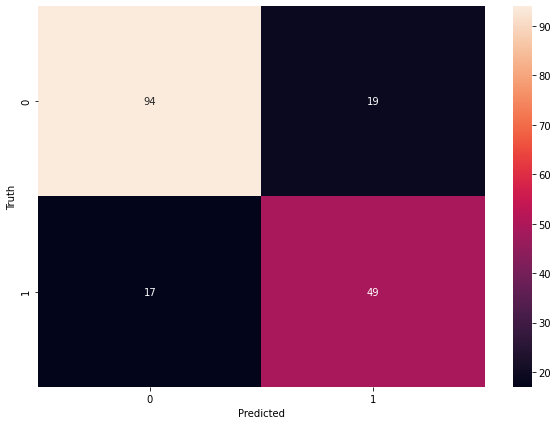

In [601]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KMeans Clustering

In [602]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [603]:
df = pd.read_csv("Income(KMeans).csv")
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Text(0, 0.5, 'Income($)')

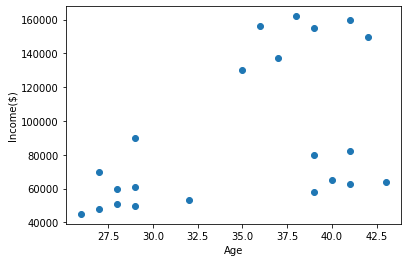

In [604]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [605]:
km = KMeans(n_clusters=3)
y_pridict = km.fit_predict(df[['Age','Income($)']])
y_pridict


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [606]:
df['cluster']=y_pridict
df.head()

Name  Age  Income($)  cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1

In [607]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

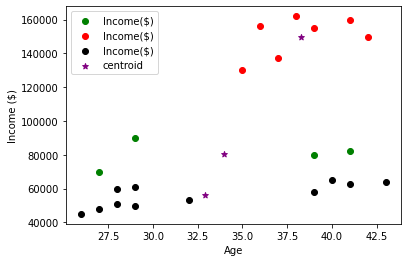

In [608]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Preprocessing using min max scaler**

In [609]:
Scaler = MinMaxScaler()

Scaler.fit(df[['Income($)']])
df['Income($)'] = Scaler.transform(df[['Income($)']])

Scaler.fit(df[['Age']])
df['Age'] = Scaler.transform(df[['Age']])

In [610]:
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

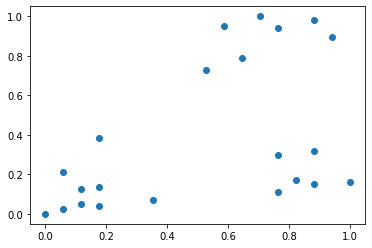

In [611]:
plt.scatter(df.Age,df['Income($)'])

In [612]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [613]:
df['cluster']=y_predicted
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0

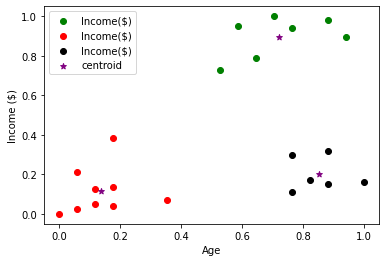

In [614]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Elbow Plot**

In [615]:
SSE = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)
  

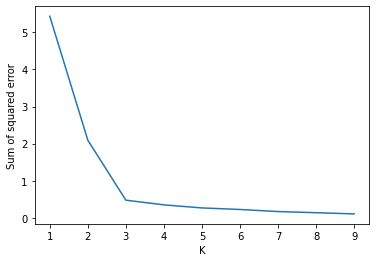

In [616]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,SSE)

# Support Vector Machine (SVM)

In [617]:
from sklearn.datasets import load_iris
iris = load_iris()


In [618]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [619]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [620]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [621]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [622]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [623]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [624]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [625]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

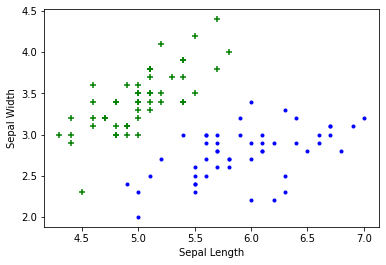

In [626]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

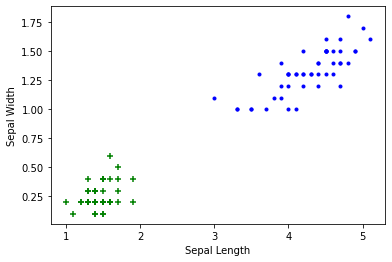

In [627]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [628]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [630]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)


SVC()

In [631]:
model.score(X_test, y_test)

0.9333333333333333

In [632]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])



**Tune parameters**

**1. Regularization (C)**


In [633]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [634]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

**2. Gamma**

In [635]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

**3. Kernel**

In [636]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [637]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

   1. Measure accuracy of your model using different kernels such as rbf and linear.
   2.Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
   3.Use 80% of samples as training data size



In [638]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [639]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [640]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [641]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [642]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [643]:
df['target'] = digits.target
df.head(20)

0    1     2     3     4     5     6    7    8     9  ...   55   56   57  \
0  0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
3  0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0   8.0  ...  0.0  0.0  0.0   
4  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
5  0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
6  0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
7  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0   0.0  ...  0.0  0.0  0.0   
8  0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
9  0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0   2.0  ...  0.0  0.0  0.0   
0  0.0  0.0   1.0   9.0  15.0  11.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0   0.0  14.0  13.0   1.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   5.0  12.0   1.0   0.0   0.0  0.0  0.0   0.0  ...  2.0  0.0  0.0   
3  0.0  2.0   9.0  15.0  14.0   9.0   3.0  0.0  0.0   4.0  ...  0.0  0.0  2.0   
4  0.0  0.0   0.0   8.0  15.0   1.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
5  0.0  5.0  12.0  13.0  16.0  16.0   2.0  0.0  0.0  11.0  ...  0.0  0.0  4.0   
6  0.0  0.0   0.0   8.0  15.0   1.0   0.0  0.0  0.0   0.0  ...  2.0  0.0  0.0   
7  0.0  0.0   1.0   8.0  15.0  10.0   0.0  0.0  0.0   3.0  ...  0.0  0.0  0.0   
8  0.0  0.0  10.0   7.0  13.0   9.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
9  0.0  0.0   6.0  14.0   4.0   0.0   0.0  0.0  0.0   0.0  ...  2.0  0.0  0.0   

     58    59    60    61    62   63  target  
0   6.0  13.0  10.0   0.0   0.0  0.0       0  
1   0.0  11.0  16.0  10.0   0.0  0.0       1  
2   0.0   3.0  11.0  16.0   9.0  0.0       2  
3   7.0  13.0  13.0   9.0   0.0  0.0       3  
4   0.0   2.0  16.0   4.0   0.0  0.0       4  
5   9.0  16.0  16.0  10.0   0.0  0.0       5  
6   1.0   9.0  15.0  11.0   3.0  0.0       6  
7  13.0   5.0   0.0   0.0   0.0  0.0       7  
8  11.0  16.0  15.0  11.0   1.0  0.0       8  
9   9.0  12.0  13.0   3.0   0.0  0.0       9  
0   1.0  10.0  13.0   3.0   0.0  0.0       0  
1   0.0   1.0  13.0  16.0   1.0  0.0       1  
2   3.0  11.0   8.0  13.0  12.0  4.0       2  
3  12.0  12.0  13.0  11.0   0.0  0.0       3  
4   0.0  10.0  15.0   4.0   0.0  0.0       4  
5  15.0  16.0   2.0   0.0   0.0  0.0       5  
6   0.0   7.0  15.0  16.0  11.0  0.0       6  
7   0.0  11.0   9.0   0.0   0.0  0.0       7  
8  11.0  14.0   5.0   0.0   0.0  0.0       8  
9   7.0  16.0  16.0  13.0  11.0  1.0       9  

[20 rows x 65 columns]

In [644]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

**Using RBF kernel**

In [645]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [646]:
rbf_model.fit(X_train, y_train)

SVC()

In [647]:
rbf_model.score(X_test,y_test)

0.9796296296296296

**Using Linear kernel**

In [648]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [649]:
linear_model.score(X_test,y_test)

0.9703703703703703

# Random Forest

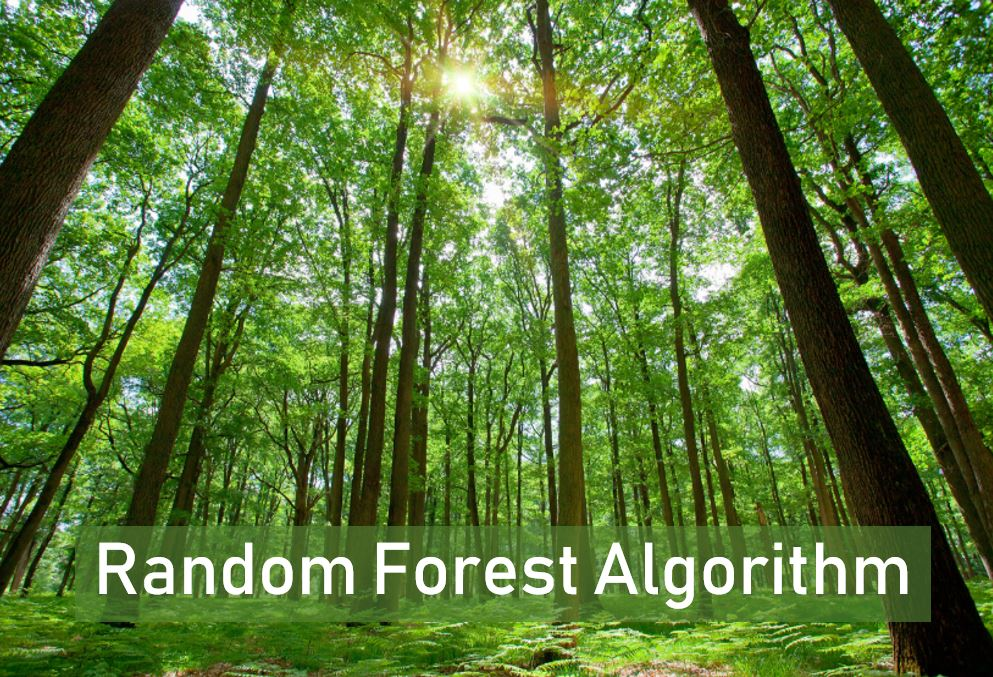

In [650]:
from sklearn.datasets import load_digits
digits = load_digits()

In [651]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [652]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [653]:
df = pd.DataFrame(digits.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [654]:
df['target'] = digits.target
df.head()

0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

In [655]:
X = df.drop('target',axis='columns')
X

0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1     0.0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2     0.0  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3     0.0  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4     0.0  0.0  0.0   2.0  16.0   4.0  0.0  0.0  
...   ...  ...  ...   ...   ...   ...  ...  ...  
1792  0.0  0.0  2.0  14.0  15.0   9.0  0.0  0.0  
1793  0.0  0.0  6.0  16.0  14.0   6.0  0.0  0.0  
1794  0.0  0.0  2.0   9.0  13.0   6.0  0.0  0.0  
1795  0.0  0.0  5.0  12.0  16.0  12.0  0.0  0.0  
1796  0.0  1.0  8.0  12.0  14.0  12.0  1.0  0.0  

[1797 rows x 64 columns]

In [656]:
y=df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [657]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [658]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [659]:
model.score(X_test,y_test)

0.9777777777777777

In [660]:
y_predicted = model.predict(X_test)
y_predicted

array([5, 3, 4, 8, 6, 8, 2, 3, 3, 4, 3, 8, 9, 0, 2, 6, 6, 9, 8, 0, 9, 7,
       7, 3, 7, 6, 1, 5, 1, 4, 8, 6, 0, 2, 3, 2, 4, 0, 2, 4, 3, 5, 1, 1,
       2, 3, 4, 7, 1, 7, 8, 0, 7, 7, 1, 2, 7, 8, 0, 2, 3, 4, 8, 6, 2, 5,
       6, 2, 1, 8, 9, 5, 7, 9, 0, 2, 6, 2, 1, 0, 5, 1, 4, 4, 3, 5, 4, 4,
       8, 3, 6, 7, 7, 0, 3, 3, 4, 0, 0, 1, 4, 7, 0, 8, 0, 5, 3, 2, 8, 1,
       6, 8, 2, 9, 6, 5, 4, 8, 4, 3, 6, 1, 9, 8, 6, 5, 3, 1, 2, 2, 9, 5,
       0, 3, 6, 9, 3, 9, 8, 8, 8, 1, 3, 1, 7, 5, 1, 5, 5, 7, 0, 6, 6, 4,
       7, 9, 6, 0, 8, 7, 2, 9, 0, 0, 7, 5, 3, 4, 5, 8, 7, 7, 3, 6, 5, 6,
       2, 1, 2, 2, 6, 4, 5, 1, 4, 4, 1, 0, 9, 8, 9, 2, 7, 6, 1, 1, 1, 5,
       5, 4, 1, 4, 0, 1, 7, 2, 3, 9, 7, 8, 0, 7, 7, 8, 6, 9, 7, 2, 7, 2,
       1, 3, 1, 9, 0, 4, 4, 5, 5, 0, 1, 6, 5, 9, 0, 8, 1, 7, 4, 0, 3, 6,
       6, 7, 2, 7, 4, 2, 1, 7, 3, 3, 5, 2, 9, 5, 0, 4, 9, 6, 0, 1, 9, 5,
       8, 8, 3, 9, 2, 0, 1, 9, 3, 5, 3, 7, 9, 9, 9, 6, 6, 3, 9, 7, 7, 9,
       3, 8, 5, 7, 7, 5, 0, 6, 1, 6, 8, 8, 8, 3, 0,

In [661]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[30,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 32]])

Text(69.0, 0.5, 'Truth')

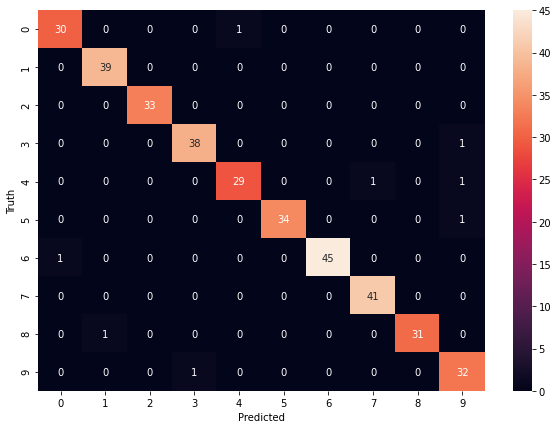

In [662]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Exercise**



Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

 **1.**Measure prediction score using default n_estimators (10)
 **2.**Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

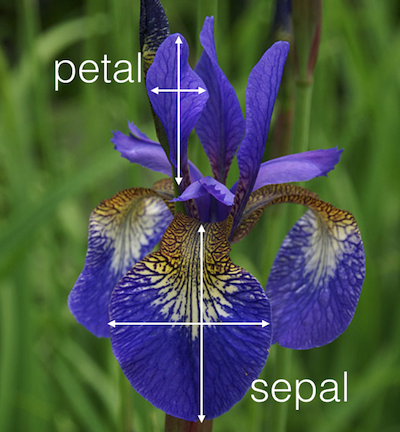

In [663]:
from sklearn.datasets import load_iris
iris = load_iris()

In [664]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [665]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [666]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [667]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [668]:
model.score(X_test,y_test)

0.9666666666666667

In [669]:
for i in range(1,50):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    model.score(X_test,y_test)
    if( model.score(X_test,y_test)>0.967):
        print(i, model.score(X_test,y_test))

# KFold Cross Validation

In [670]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [671]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)


In [672]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.9592592592592593

In [673]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.42592592592592593

In [674]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

**KFold cross validation**


 **Basic example**

In [675]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [676]:
KFold(n_splits=3, random_state=None, shuffle=False)

KFold(n_splits=3, random_state=None, shuffle=False)

In [677]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**KFold for our digits example**

In [678]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [679]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))


In [680]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [681]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [682]:
scores_rf

[0.9282136894824707, 0.9348914858096828, 0.9198664440734557]

**Using cross_val_score function**

In [683]:
from sklearn.model_selection import cross_val_score

In [684]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [685]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [686]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


array([0.93322204, 0.95325543, 0.92320534])

# KNN

In [687]:
import pandas as pd
  
# intialise data of lists.
data = {'Height(in cms)':[158,158,158,160,160,163,163,160,163,165,165,165,168,168,168,170,170,170],
        'Weight(in kgs)':[58,59,63,59,60,60,61,64,64,61,62,65,62,63,66,63,64,68],
        'The_weightlifting_category' : ['M','M','M','M','M','M','M','L','L','L',
                                        'L','L','L','L','L','L','L','L']}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df.head()

Height(in cms)  Weight(in kgs) The_weightlifting_category
0             158              58                          M
1             158              59                          M
2             158              63                          M
3             160              59                          M
4             160              60                          M

In [688]:
df['The_weightlifting_category'] = df.The_weightlifting_category.map({'M': 1, 'L': 2})
df.head()

Height(in cms)  Weight(in kgs)  The_weightlifting_category
0             158              58                           1
1             158              59                           1
2             158              63                           1
3             160              59                           1
4             160              60                           1

In [689]:
X=df[['Height(in cms)','Weight(in kgs)']]
y=df['The_weightlifting_category']

In [690]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [691]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [692]:
y_pred = model.predict(X_test)
y_pred 

array([1, 1, 2, 1])

In [693]:
print(model.predict([[161,61]]))

[1]


In [694]:
model.score(X_test, y_test)

0.75

In [695]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 1],
       [0, 0]])

Text(42.0, 0.5, 'Truth')

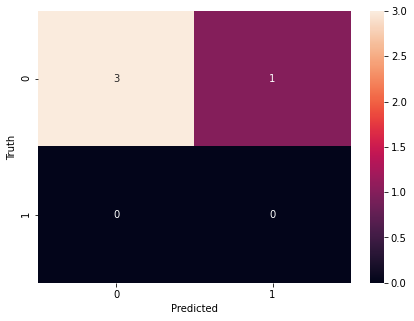

In [696]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Naive Bayes Classifier

In [697]:
df = pd.read_csv("Titanic(DT).csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [698]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [699]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [700]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [701]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

Pclass     Sex   Age     Fare  female  male
0       3    male  22.0   7.2500       0     1
1       1  female  38.0  71.2833       1     0
2       3  female  26.0   7.9250       1     0
3       1  female  35.0  53.1000       1     0
4       3    male  35.0   8.0500       0     1

In [702]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

Pclass   Age     Fare  female  male
0       3  22.0   7.2500       0     1
1       1  38.0  71.2833       1     0
2       3  26.0   7.9250       1     0
3       1  35.0  53.1000       1     0
4       3  35.0   8.0500       0     1

In [703]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [704]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [705]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

Pclass        Age     Fare  female  male
0       3  22.000000   7.2500       0     1
1       1  38.000000  71.2833       1     0
2       3  26.000000   7.9250       1     0
3       1  35.000000  53.1000       1     0
4       3  35.000000   8.0500       0     1
5       3  29.699118   8.4583       0     1

In [706]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [707]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [708]:
model.fit(X_train,y_train)

GaussianNB()

In [709]:
model.score(X_test,y_test)

0.7932960893854749

In [710]:
X_test[:10]

Pclass   Age     Fare  female  male
580       2  25.0  30.0000       1     0
864       2  24.0  13.0000       0     1
418       2  30.0  13.0000       0     1
721       3  17.0   7.0542       0     1
858       3  24.0  19.2583       1     0
491       3  21.0   7.2500       0     1
884       3  25.0   7.0500       0     1
138       3  16.0   9.2167       0     1
238       2  19.0  10.5000       0     1
880       2  25.0  26.0000       1     0

In [711]:
y_test[:10]

580    1
864    0
418    0
721    0
858    1
491    0
884    0
138    0
238    0
880    1
Name: Survived, dtype: int64

In [712]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [713]:
model.predict_proba(X_test[:10])

array([[0.01941746, 0.98058254],
       [0.97327294, 0.02672706],
       [0.97523198, 0.02476802],
       [0.98506809, 0.01493191],
       [0.04224828, 0.95775172],
       [0.98629948, 0.01370052],
       [0.98719023, 0.01280977],
       [0.98485841, 0.01514159],
       [0.97053243, 0.02946757],
       [0.02002908, 0.97997092]])

**Spam Mail Detection using Naive Bayes**

In [714]:
df = pd.read_csv("spam.csv")
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [715]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [716]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

In [717]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.25)

**How to convert Message Column in number**

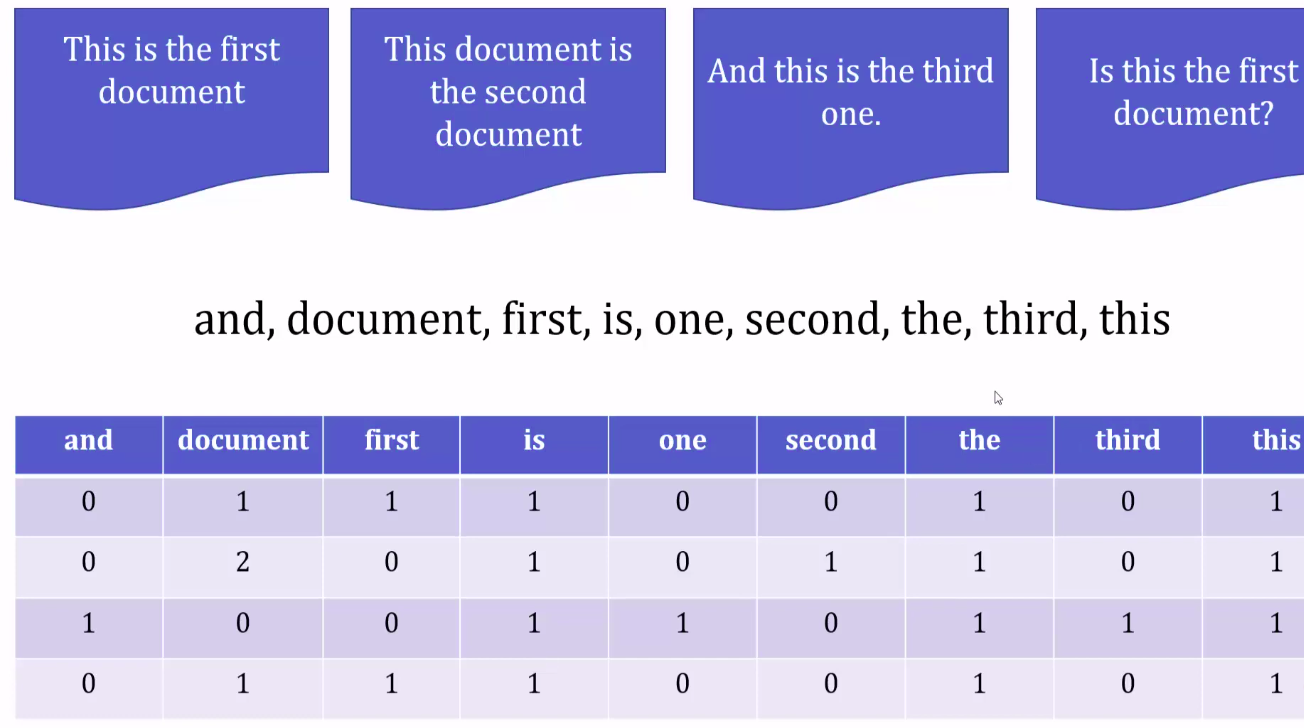

In [718]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [719]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [720]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [721]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9842067480258435

**Sklearn Pipeline**

In [722]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [723]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [724]:
clf.score(X_test,y_test)

0.9842067480258435

In [725]:
clf.predict(emails)

array([0, 1])